# Limpieza de Datos I

In [1]:
#Primero importamos las librerías que vamos a usar
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

In [2]:
#Después importamos los datos del archivo CSV que tenemos
df_bmw = pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/bmw_pricing_v3.csv")

In [3]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [4]:
#Una vez comprobado que el DataFrame carga bien, vamos a ver la estructura que tienen los datos.
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
#Cambiamos las columnas fecha_registro y fecha_venta a formato datetime
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])

df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [6]:
#Para una mejor lectura y comprensión de los datos, dividiremos la columna fecha_venta en 3 nuevas según el día, el mes y  el año de venta.
for col in ["fecha_venta"]:
    df_bmw[col + "_MES"] = df_bmw[col].dt.month
    df_bmw[col + "_AÑO"] = df_bmw[col].dt.year

df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_venta_MES,fecha_venta_AÑO
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,1.0,2018.0
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,2.0,2018.0
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2.0,2018.0
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,2.0,2018.0
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,4.0,2018.0


In [7]:
#Ahora procederemos a quitar las columnas de marca, modelo (por ser irrelevantes para el estudio) y fecha venta por ser repetida:
df_bmw.drop(["modelo", "marca", "fecha_venta"], axis=1, inplace=True)

In [8]:
#Vamos a buscar los nulos y a quitarlos de enmedio
sin_nulos = ["km", "potencia", "tipo_gasolina", "volante_regulable", "camara_trasera", "elevalunas_electrico", "precio", "fecha_venta_MES", "fecha_venta_AÑO"]
df_bmw2 = df_bmw.dropna(subset=sin_nulos)

df_bmw2.isnull().sum()

km                                0
potencia                          0
fecha_registro                 2411
tipo_gasolina                     0
color                           442
tipo_coche                     1451
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3376
elevalunas_electrico              0
bluetooth                       726
gps                               0
alerta_lim_velocidad            726
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [9]:
#Y ahora guardamos una copia en df_bmw3
df_bmw3= df_bmw2.copy()

In [10]:
#Guardamos el DataFrame en  un pickle para seguir trabajando desde aquí mas adelante y no tener que cargar todo de nuevo
pd.to_pickle(df_bmw3, "/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_15ENE24_PK")

<Axes: >

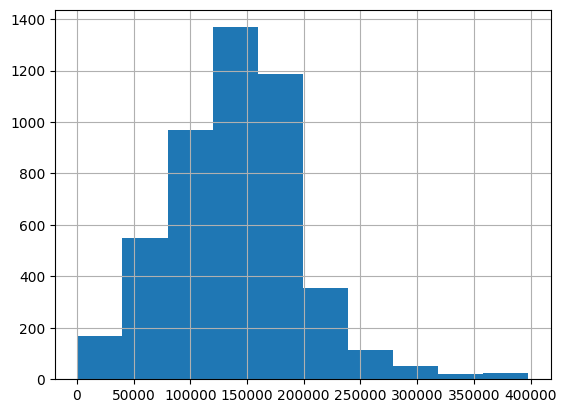

In [65]:
#Me salen algunos outliers en la columna "km" en un primer vistazo por lo que procedo a su eliminación para que los datos estén mas normalizados

df_bmw3.drop(df_bmw3[((df_bmw3["km"]<0) | (df_bmw3["km"]>400000))].index, inplace=True)

df_bmw3["km"].hist()

<Axes: >

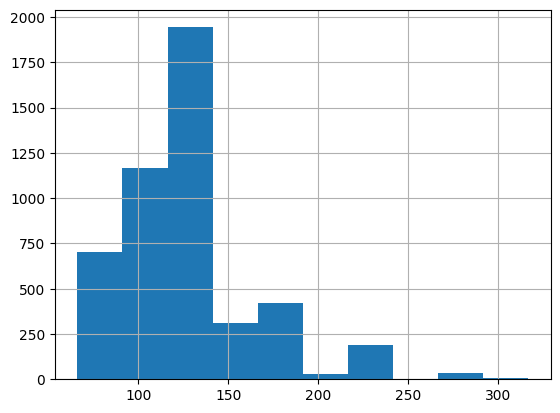

In [66]:
#Ahora pasamos a quitar los outliers de la columna de "potencia" ya que no nos dicen mucho y así normalizamos los datos
df_bmw3.drop(df_bmw3[((df_bmw3["potencia"]<=50) | (df_bmw3["potencia"]>=400))].index, inplace=True)
df_bmw3["potencia"].hist()

<Axes: >

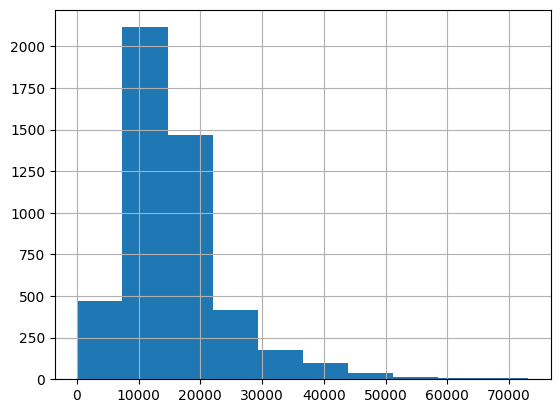

In [67]:
#Ahora hacemos lo mismo con los outliers de la columna "precio"
df_bmw3.drop(df_bmw3[((df_bmw3["precio"]<=50) | (df_bmw3["precio"]>=75000))].index, inplace=True)
df_bmw3["precio"].hist()

In [ ]:
#Haciendo un .info() del DataFrame comprobamos que casi la mita de los datos de la columna "fecha_registro" son nulos por lo que procedemos a eliminarla
df_bmw3.drop("fecha_registro", axis=1, inplace=True)
df_bmw3.info()

In [35]:
#Ahora los valores nulos de las columnas "color" y "tipo_coche" los cambiamos a "desconocido"
df_bmw3["color"].fillna("desconocido", inplace=True)
df_bmw3["tipo_coche"].fillna("desconocido", inplace=True)

df_bmw3.isnull().sum()

km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3370
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            724
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [36]:
#Hago una copia de la tabla a modo de punto de control y sigo avanzando
df_bmw4 = df_bmw3.copy()

In [37]:
#Vuelvo a guardar el DataFrame en un archivo Pickle para seguir mas adelante
pd.to_pickle(df_bmw4,"/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_15ENE24_PK")

# Limpieza de Datos II

In [39]:
#Recupero el archivo .pickle para seguir trabajando desde ahí en una nueva variable
df_bmw5 = pd.read_pickle("primera_entrega_15ENE24_PK")

In [45]:
df_bmw5.isnull().sum()

km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3370
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            724
precio                            0
fecha_venta_MES                   0
fecha_venta_AÑO                   0
dtype: int64

In [47]:
#Viendo la .info() del DataFrame, procedo a eliminar la columna "asientos_traseros_plegables" por tener mas de 3000 registros nulos.
df_bmw5.drop("asientos_traseros_plegables", axis=1, inplace=True)

In [69]:
df_bmw5.isnull().sum()

km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta_MES         0
fecha_venta_AÑO         0
dtype: int64

In [68]:
#Procedo a sustituir los valores nulos de las columnas "aire_acondicionado", "bluetooth" y "alerta_limite_velocidad" por sus medianas ya que no me interesan eliminarlos completamente por los porcentajes de datos que representan.
df_bmw5["aire_acondicionado"].fillna(df_bmw5["aire_acondicionado"].mean(), inplace=True)
df_bmw5["bluetooth"].fillna(df_bmw5["bluetooth"].mean(), inplace=True)
df_bmw5["alerta_lim_velocidad"].fillna(df_bmw5["alerta_lim_velocidad"].mean(), inplace=True)

In [70]:
#Ahora transformo las columnas booleanas en valores numéricos 0 y 1
boolean = ["volante_regulable", "aire_acondicionado", "camara_trasera", "elevalunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad"]

for col in boolean:
    df_bmw5[col] = df_bmw5[col].astype("int64")

df_bmw5.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,fecha_venta_AÑO
0,140411.0,100.0,diesel,black,desconocido,1,1,0,1,0,1,0,11300.0,1.0,2018.0
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2.0,2018.0
2,183297.0,120.0,diesel,white,desconocido,0,0,0,1,0,1,0,10200.0,2.0,2018.0
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,2.0,2018.0
4,97097.0,160.0,diesel,silver,desconocido,1,1,0,0,1,1,1,33400.0,4.0,2018.0


In [79]:
df_bmw5["tipo_gasolina"].value_counts()

tipo_gasolina
diesel    4622
petrol     189
Name: count, dtype: int64

In [ ]:
#Se han eliminado los valores pequeños dentro de la columna "tipo_gasolina" ya que no aportan nada al conjunto de datos
valores_pequeños = ['Diesel', 'hybrid_petrol', 'electro']

df_bmw5['tipo_gasolina'].replace(valores_pequeños, inplace=True)
df_bmw5.dropna(subset=['tipo_gasolina'], inplace=True)

In [83]:
df_bmw5["tipo_coche"].value_counts()

tipo_coche
desconocido    1649
estate         1097
sedan           826
suv             752
hatchback       487
Name: count, dtype: int64

In [82]:
#Al igual que en la columna anterior, voy a eliminar los valores pequeños
valores_pequeños_coches = ["van", "convertible", "coupe", "subcompact"]

df_bmw5["tipo_coche"].replace(valores_pequeños_coches, inplace=True)
df_bmw5.dropna(subset=["tipo_coche"], inplace=True)

/var/folders/fg/y114z21j2zn039z19n0n8cdh0000gn/T/ipykernel_31616/1569373261.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw5["tipo_coche"].replace(valores_pequeños_coches, inplace=True)


In [85]:
df_bmw5["fecha_venta_AÑO"].value_counts()

fecha_venta_AÑO
2018.0    4807
2007.0       1
2010.0       1
2009.0       1
2008.0       1
Name: count, dtype: int64

In [86]:
#Vemos en la columnla "fecha_venta_AÑO" hay una serie de outliers que voy a eliminar para que no interfeieran en mi DataFrame
df_bmw5 = df_bmw5[df_bmw5["fecha_venta_AÑO"] >= 2018]

df_bmw5["fecha_venta_AÑO"].value_counts()

fecha_venta_AÑO
2018.0    4807
Name: count, dtype: int64

In [87]:
df_bmw5.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,fecha_venta_AÑO
0,140411.0,100.0,diesel,black,desconocido,1,1,0,1,0,1,0,11300.0,1.0,2018.0
1,13929.0,317.0,petrol,grey,desconocido,1,1,0,0,1,1,1,69700.0,2.0,2018.0
2,183297.0,120.0,diesel,white,desconocido,0,0,0,1,0,1,0,10200.0,2.0,2018.0
3,128035.0,135.0,diesel,red,desconocido,1,1,0,1,1,1,0,25100.0,2.0,2018.0
4,97097.0,160.0,diesel,silver,desconocido,1,1,0,0,1,1,1,33400.0,4.0,2018.0


In [88]:
pd.to_pickle(df_bmw5, "/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_1_15ENE24/primera_entrega_15ENE24_PK")

# Análisis Univariable y Correlación